In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from common.env_lib import csv_solar_harvester

In [2]:
# Get data for all years and store in a dictionary
annual_rec = {}
for yr in range(1995,2019):
    harvester = csv_solar_harvester(location='tokyo', 
                                    year=yr,
                                    HENERGY_NOISE=0.0,
                                    PREDICTION_HORIZON=240*3, # lookahead horizon to predict energy
                                    PENERGY_NOISE=0.000)
    done = False
    henergy_rec=[]
    while not done:
        _,henergy,_,_,done = harvester.step()
        henergy_rec.append(henergy)
    annual_rec[yr] = henergy_rec

In [3]:
all_trace = []
for key in annual_rec:
    for trace in annual_rec[key]:
        all_trace.append(trace)

0.1390479287445159

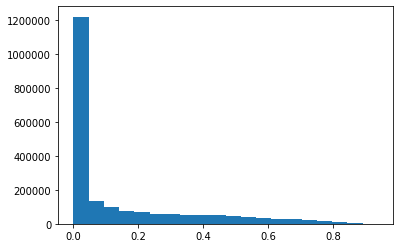

In [8]:
plt.hist(all_trace, bins=20);
# plt.yscale('log')
np.array(all_trace).mean()

0.20098399342333817

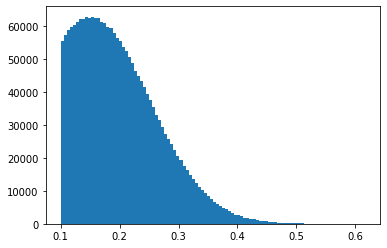

In [5]:
lower, upper = 0.1,1
mu, sigma = 0.15, 0.1
req = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
sense = req.rvs(len(all_trace))
plt.hist(sense, bins=100);
sense.mean()

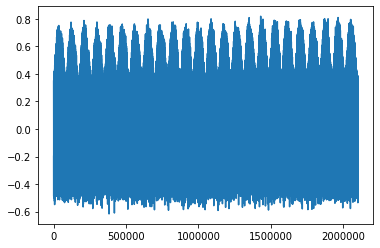

In [6]:
res = all_trace-sense
plt.plot(res)